In [1]:
!pip install scikit-learn

In [ ]:
!pip install tensorflow


# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'C:/Users/gonza/OneDrive/Escritorio/Flor/')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Users/gonza/OneDrive/Escritorio/Flor/\
C:/Users/gonza/OneDrive/Escritorio/Flor/\Daisy 1
C:/Users/gonza/OneDrive/Escritorio/Flor/\Girasol 1528
C:/Users/gonza/OneDrive/Escritorio/Flor/\Iris 1710
C:/Users/gonza/OneDrive/Escritorio/Flor/\Rosa 1236
C:/Users/gonza/OneDrive/Escritorio/Flor/\Tulipan 1800
Directorios leidos: 5
Imagenes en cada directorio [1529, 1710, 1236, 1800, 1967]
suma Total de imagenes en subdirs: 8242


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  8242


In [5]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 Daisy
1 Girasol
2 Iris
3 Rosa
4 Tulipan


In [7]:

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (6593, 200, 200, 3) (6593,)
Testing data shape :  (1649, 200, 200, 3) (1649,)


Text(0.5, 1.0, 'Ground Truth : 0')

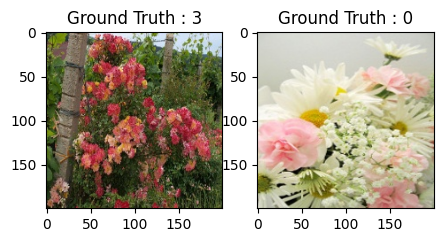

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

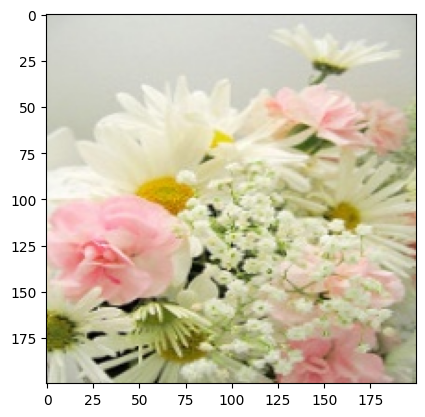

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

# Hacemos el One-hot Encoding para la red

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [13]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(5274, 200, 200, 3) (1319, 200, 200, 3) (5274, 5) (1319, 5)


# Creamos el modelo de CNN

In [38]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 12 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
# batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [39]:
Flower_model = Sequential()
#Flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
Flower_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(200, 200, 3)))

Flower_model.add(LeakyReLU(alpha=0.1))
Flower_model.add(MaxPooling2D((2, 2),padding='same'))
Flower_model.add(Dropout(0.5))

Flower_model.add(Flatten())
Flower_model.add(Dense(32, activation='linear'))
Flower_model.add(LeakyReLU(alpha=0.1))
Flower_model.add(Dropout(0.5))
Flower_model.add(Dense(nClasses, activation='softmax'))

In [40]:
Flower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 flatten_2 (Flatten)         (None, 320000)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                10240032  
                                                      

In [41]:
Flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [42]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
Flower_train = Flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/12
165/165 [==============================] - 41s 245ms/step - loss: 1.4520 - accuracy: 0.3506 - val_loss: 1.2837 - val_accuracy: 0.5299
Epoch 2/12
165/165 [==============================] - 41s 248ms/step - loss: 1.2834 - accuracy: 0.4759 - val_loss: 1.1600 - val_accuracy: 0.5641
Epoch 3/12
165/165 [==============================] - 45s 275ms/step - loss: 1.2041 - accuracy: 0.5258 - val_loss: 1.1120 - val_accuracy: 0.5709
Epoch 4/12
165/165 [==============================] - 39s 237ms/step - loss: 1.1656 - accuracy: 0.5404 - val_loss: 1.0752 - val_accuracy: 0.6012
Epoch 5/12
165/165 [==============================] - 39s 239ms/step - loss: 1.1289 - accuracy: 0.5656 - val_loss: 1.0526 - val_accuracy: 0.6096
Epoch 6/12
165/165 [==============================] - 39s 238ms/step - loss: 1.0895 - accuracy: 0.5853 - val_loss: 1.0322 - val_accuracy: 0.6096
Epoch 7/12
165/165 [==============================] - 39s 236ms/step - loss: 1.0782 - accuracy: 0.5882 - val_loss: 1.0214 - val_ac

In [51]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
Flower_model.save("celulas.h5py")

INFO:tensorflow:Assets written to: celulas.h5py\assets


INFO:tensorflow:Assets written to: celulas.h5py\assets


# Evaluamos la red

In [43]:
test_eval = Flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

52/52 [==============================] - 2s 39ms/step - loss: 0.9827 - accuracy: 0.6258


In [44]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.9826987981796265
Test accuracy: 0.6258338093757629


In [23]:
Flower_train.history

{'loss': [1.4598407745361328,
  1.3141387701034546,
  1.2528023719787598,
  1.2081180810928345,
  1.1611781120300293,
  1.113289475440979,
  1.087389588356018,
  1.0648812055587769,
  1.0526835918426514,
  1.0318515300750732,
  1.0133403539657593,
  0.9954509735107422,
  0.9825212359428406,
  0.9661683440208435,
  0.9583901762962341,
  0.950139582157135,
  0.9334956407546997,
  0.9280614852905273,
  0.9050465226173401,
  0.9030457139015198],
 'accuracy': [0.34850209951400757,
  0.4416002929210663,
  0.47080016136169434,
  0.5079635977745056,
  0.5400075912475586,
  0.5657944679260254,
  0.583428144454956,
  0.594994306564331,
  0.5972696542739868,
  0.6128175854682922,
  0.6198331713676453,
  0.6283655762672424,
  0.6302616596221924,
  0.6397421360015869,
  0.6410694122314453,
  0.647136926651001,
  0.6533939838409424,
  0.6524459719657898,
  0.6674250960350037,
  0.6638225317001343],
 'val_loss': [1.3180314302444458,
  1.2341023683547974,
  1.1698262691497803,
  1.15205979347229,
  1.

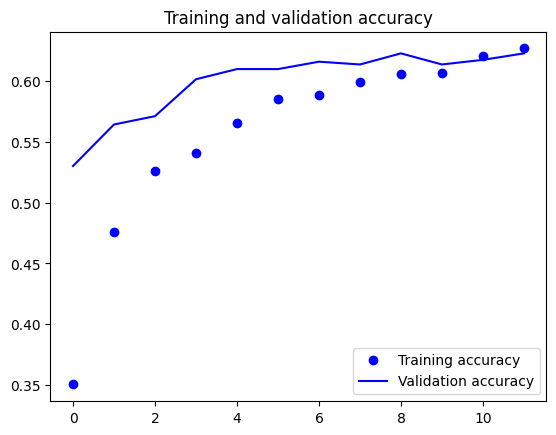

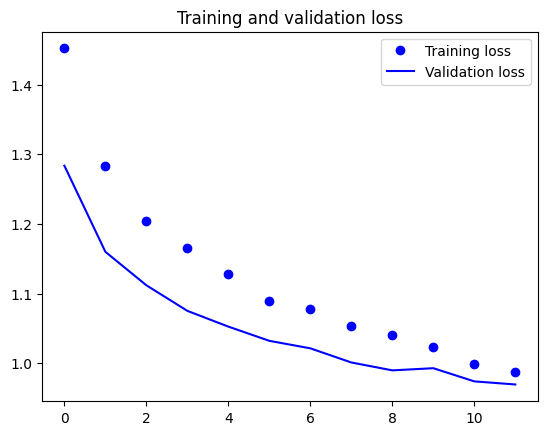

In [45]:
accuracy = Flower_train.history['accuracy']
val_accuracy = Flower_train.history['val_accuracy']
loss = Flower_train.history['loss']
val_loss = Flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
predicted_classes2 = Flower_model.predict(test_X)

52/52 [==============================] - 2s 40ms/step


In [47]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [48]:
predicted_classes.shape, test_Y.shape

((1649,), (1649,))

# Aprendamos de los errores: Qué mejorar

Found 1032 correct labels


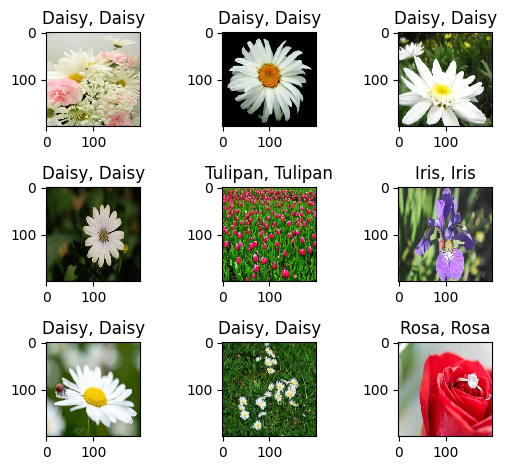

In [49]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(200,200,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

Found 617 incorrect labels


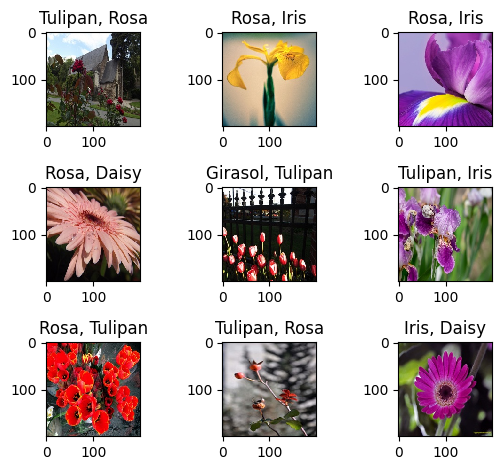

In [50]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(200,200,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

# Aplicamos el módelo

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

modelo = 'celulas.h5py'
model = tf.keras.models.load_model(modelo)

target_size = (200, 200)
flower = "C:/Users/gonza/Downloads/descargar.jpeg"

img = image.load_img(flower, target_size=target_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
predictions = model.predict(img_array)
print("Prediccion", predictions)

class_labels = ["Daisy", "Girasol", "Iris", "Rosa", "Tulipan"]
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[i] for i in predicted_class_indices]

# Print the predicted class labels
print("Predicted class:", predicted_labels[0])

1/1 [==============================] - 0s 68ms/step
Prediccion [[0. 0. 0. 1. 0.]]
Predicted class: Rosa


Predicción de imagenes de prueba

In [5]:
import re
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
import numpy as np

dirname = os.path.join(os.getcwd(), 'C:/Users/gonza/Downloads/Prueba3/')
imgpath = dirname + os.sep

model_path = 'celulas.h5py'
model = tf.keras.models.load_model(model_path)

target_size = (200, 200)

allowed_extensions = re.compile(r"\.(jpg|jpeg|png|bmp|tiff|webp)$", re.IGNORECASE)
image_files = [f for f in os.listdir(dirname) if allowed_extensions.search(f)]

for flower in image_files:
    img_path = os.path.join(dirname, flower)

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    class_labels = ["Daisy", "Girasol", "Iris", "Rosa", "Tulipan"]
    predicted_class_indices = np.argmax(predictions, axis=1)
    predicted_label = class_labels[predicted_class_indices[0]]

    print(flower, "-------- Predicción:", predicted_label, "Probabilidades:", predictions[0])
    print("-----------------------------------------")

1/1 [==============================] - 0s 78ms/step
descargar (1).jpg -------- Predicción: Daisy Probabilidades: [1. 0. 0. 0. 0.]
-----------------------------------------
1/1 [==============================] - 0s 26ms/step
descargar (2).jpg -------- Predicción: Rosa Probabilidades: [0. 0. 0. 1. 0.]
-----------------------------------------
1/1 [==============================] - 0s 30ms/step
descargar.jpg -------- Predicción: Rosa Probabilidades: [0. 0. 0. 1. 0.]
-----------------------------------------
